# Plots the DFT ground state energy of the combined hBN-water system as a function of plane wave energy cutoff.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def make_df(data_path):
    df = pd.read_table(
        data_path,
        delim_whitespace=True,
        header=None,
        names=[
            "system",
            "functional",
            "ecp",
            "ecut_ev",
            "Nk",
            "Ns",
            "total_energy_ryd",
        ],
    )
    return df


def plot_kmesh_extrapolation(df):
    system = df["system"].values[0]
    functional = df["functional"].values[0]
    ecp = df["ecp"].values[0]
    ecut_ev = df["ecut_ev"].values[0]
    Ns = df["Ns"].values[0]
    plt.figure(figsize=(5, 5))
    plt.title(
        f"K-mesh extrapolation for hBN-water system"
        + f"\n {functional}, {ecp}, E$_{{cut}}$ = {ecut_ev} eV, {Ns}x{Ns}x1 supercell"
    )
    plt.xlabel(r"$N_{k_x} \cdot N_{k_y}$")
    plt.ylabel("DFT total energy (eV)")
    plt.plot(
        "kmesh_size",
        "total_energy_ev",
        data=df,
        linestyle="solid",
        marker="o",
    )
    plt.savefig(
        f"/Users/Nathan/Desktop/kmesh_extrapolation_{system}_{functional}_ecut_{ecut_ev}_{ecp}_Ns_{Ns}.png",
        dpi=300,
        bbox_inches="tight",
    )

In [17]:
data_path = "total_energy_data.txt"
ryd_per_ev = 0.0734986176
df = make_df(data_path)
df["total_energy_ev"] = (
    df["total_energy_ryd"].values - np.amin(df["total_energy_ryd"].values)
) / ryd_per_ev
df["kmesh_size"] = np.power(df["Nk"].values, 2)
df

,system,functional,ecp,ecut_ev,Nk,Ns,total_energy_ryd,total_energy_ev,kmesh_size
0,hBN_water_Oup_Hdown,pbe,paw,700,1,1,-203.264343,3.059621,1
1,hBN_water_Oup_Hdown,pbe,paw,700,2,1,-203.479286,0.135181,4
2,hBN_water_Oup_Hdown,pbe,paw,700,3,1,-203.488394,0.011250,9
3,hBN_water_Oup_Hdown,pbe,paw,700,4,1,-203.489110,0.001511,16
4,hBN_water_Oup_Hdown,pbe,paw,700,5,1,-203.489221,0.000000,25


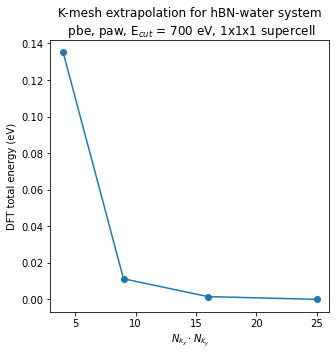

In [19]:
plot_kmesh_extrapolation(df[df.Nk > 1])